# Project: Wrangling and Analyze Data

## Data Gathering
Gathering **all** three pieces of data for this project. 

In [1]:
# Importing relevant libraries
import pandas as pd
import numpy as np
import requests 
import tweepy
import json
from io import StringIO
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

1. The WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
archive_df = pd.read_csv('twitter-archive-enhanced.csv')
archive_df.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


2. Download the tweet image prediction (image_predictions.tsv)

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
image_df = pd.read_csv(StringIO(response.text), sep='\t')

In [4]:
image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Additional data from the Twitter API (tweet_json.txt)

In [5]:
# #import tweepy
# from tweepy import OAuthHandler
# import json
# from timeit import default_timer as timer

# # Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# # These are hidden to comply with Twitter's API terms and conditions
# consumer_key = 'HIDDEN'
# consumer_secret = 'HIDDEN'
# access_token = 'HIDDEN'
# access_secret = 'HIDDEN'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

# # NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# # df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# # change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# # NOTE TO REVIEWER: this student had mobile verification issues so the following
# # Twitter API code was sent to this student from a Udacity instructor
# # Tweet IDs for which to gather additional data via Twitter's API
# tweet_ids = df_1.tweet_id.values
# len(tweet_ids)

# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepError as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)

In [6]:
df_list = []
with open('tweet-json.txt') as f:
    for tweets in f:
        contents = f.readline()
        line = json.loads(contents)
        tweet_id = line['id']
        retweet_count = line['retweet_count']
        favorite_count = line['favorite_count']
        df_list.append({'tweet_id':tweet_id, 'retweet_count':retweet_count,
                       'favorite_count':favorite_count})
api_df = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])
api_df

,tweet_id,retweet_count,favorite_count
0,892177421306343426,6514,33819
1,891689557279858688,8964,42908
2,891087950875897856,3261,20562
3,890729181411237888,16716,56848
4,890240255349198849,7711,32467
...,...,...,...
1172,666057090499244032,146,304
1173,666051853826850816,879,1253
1174,666049248165822465,41,111
1175,666033412701032449,47,128


## Assessing Data

In [7]:
archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [8]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
api_df

,tweet_id,retweet_count,favorite_count
0,892177421306343426,6514,33819
1,891689557279858688,8964,42908
2,891087950875897856,3261,20562
3,890729181411237888,16716,56848
4,890240255349198849,7711,32467
...,...,...,...
1172,666057090499244032,146,304
1173,666051853826850816,879,1253
1174,666049248165822465,41,111
1175,666033412701032449,47,128


In [10]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        1177 non-null   int64
 1   retweet_count   1177 non-null   int64
 2   favorite_count  1177 non-null   int64
dtypes: int64(3)
memory usage: 27.7 KB


In [11]:
image_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [12]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Quality issues
#### `archive` table
1. tweet_id is int not a string

2. time_stamp is object not datetime

3. a and an are not real names of dogs in name column

4. incorrent rating denominators with values not 10

5. There are retweeted entries and replies

6. There are entries without image

7. Null values represented as None

8. some dogs have multiple dog stages

9. Missing names of dogs

### Tidiness issues
1. One variable `dog stage` split into four columns
2. Data gotten from differnet sources should be merged

## Cleaning Data

In [13]:
# Make copies of original pieces of data
archive_df_clean = archive_df.copy()
image_df_clean = image_df.copy()
api_df_clean = api_df.copy()

### Tidiness

### Issue #1: One variable dog stage split into four columns

#### Define: 
Convert the doggo, floofer, pupper, puppo columns into two dog stage columns, comprising of the dog stages of each dog 

#### Code

In [14]:
archive_df_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [15]:
dog_stage_columns = ['doggo', 'floofer', 'pupper', 'puppo']
dog_stage=[]
for i, row in archive_df_clean.iterrows():
    data = [row['doggo'], row['floofer'], row['pupper'], row['puppo']]
    answer = []
    for d in data:
        if d in dog_stage_columns:
            answer.append(d)
            if 'None' in answer:
                answer.remove('None')
        else:
            if 'None' not in answer and len(answer) == 0:
                answer.append('None')
    dog_stage.append(answer)

In [16]:
dog_stage = pd.DataFrame(dog_stage,columns=['dog_stage1','dog_stage2'])
dog_stage.head()

,dog_stage1,dog_stage2
0,None,None
1,None,None
2,None,None
3,None,None
4,None,None


In [17]:
archive_df_clean = archive_df_clean.join(dog_stage)
archive_df_clean.drop(dog_stage_columns,axis=1,inplace=True)

#### Test

In [18]:
archive_df_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage1', 'dog_stage2'],
      dtype='object')

### Issue #2: Data gotten from differnet sources should be merged

#### Define: 
merge the archive_df, image_df and api_df. Joing on the tweet id

#### Code

In [19]:
twitter_df_clean = pd.merge(archive_df_clean, api_df_clean, on='tweet_id',how='outer')
twitter_df_clean = pd.merge(twitter_df_clean, image_df_clean, on= 'tweet_id', how='outer')

#### Test

In [20]:
twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  dog_stage1                  2356 

### Quality 

### Issue #1: tweet_id is int not a string

#### Define: 
Convert the tweet_id column's data type from a int to a string using astype

In [21]:
twitter_df_clean.dtypes.tweet_id

dtype('int64')

#### Code

In [22]:
twitter_df_clean['tweet_id'] = twitter_df_clean['tweet_id'].astype(str)

#### Test

In [23]:
twitter_df_clean.dtypes.tweet_id

dtype('O')

### Issue #2: timestamp is object not datetime

#### Define:
Convert timestamp column to date_time format

In [24]:
twitter_df_clean.dtypes.timestamp

dtype('O')

#### Code

In [25]:
twitter_df_clean.timestamp = pd.to_datetime(twitter_df_clean.timestamp)

#### Test

In [26]:
twitter_df_clean.dtypes.timestamp

datetime64[ns, UTC]

### Issue #3: a and an are not real names of dogs in name column

#### Define:
Replace values a and an with null values in the name columns

In [27]:
twitter_df_clean.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

#### Code

In [28]:
twitter_df_clean.name = twitter_df_clean.name.replace(['a','an'],np.nan)

#### Test

In [29]:
twitter_df_clean.name.value_counts()

None          745
Charlie        12
Lucy           11
Cooper         11
Oliver         11
             ... 
Aqua            1
Chase           1
Meatball        1
Rorie           1
Christoper      1
Name: name, Length: 955, dtype: int64

### Issue #4: incorrent rating denominators with values not 10

#### Define:
replacing all values of rating_denominator with 10

In [30]:
twitter_df_clean.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

#### Code

In [31]:
denominator = twitter_df_clean.rating_denominator
twitter_df_clean.rating_denominator = np.where((denominator!=10),10,denominator)

#### Test

In [32]:
twitter_df_clean.rating_denominator.value_counts()

10    2356
Name: rating_denominator, dtype: int64

### Issue #5: There are retweeted entries and replies

#### Define:
Droping the rows that have retweeted_status_user_id as they show retweeted entries

In [33]:
twitter_df_clean.query('retweeted_status_user_id == retweeted_status_user_id').shape

(181, 28)

#### Code

In [34]:
twitter_df_clean = twitter_df_clean.query('retweeted_status_user_id != retweeted_status_user_id')
twitter_df_clean = twitter_df_clean.query('in_reply_to_user_id != in_reply_to_user_id')

#### Test

In [35]:
twitter_df_clean.query('retweeted_status_user_id == retweeted_status_user_id').shape

(0, 28)

In [36]:
twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2097 non-null   object             
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2097 non-null   datetime64[ns, UTC]
 4   source                      2097 non-null   object             
 5   text                        2097 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2094 non-null   object             
 10  rating_numerator            2097 non-null   int64           

### Issue #6:There are entries without image

#### Define:
drop the rows that doesnt have images

In [37]:
twitter_df_clean.query('img_num != img_num').shape

(126, 28)

#### Code

In [38]:
twitter_df_clean = twitter_df_clean.query('img_num == img_num')

#### Test

In [39]:
twitter_df_clean.query('img_num != img_num').shape

(0, 28)

### Issue #7:Null values represented as None

#### Define:
Replace None values with null values

In [40]:
twitter_df_clean[['dog_stage1','dog_stage2']]

,dog_stage1,dog_stage2
0,None,None
1,None,None
2,None,None
3,None,None
4,None,None
...,...,...
2351,None,None
2352,None,None
2353,None,None
2354,None,None


#### Code

In [41]:
twitter_df_clean = twitter_df_clean.replace('None',np.nan)

#### Test

In [42]:
twitter_df_clean[['dog_stage1','dog_stage2']]

,dog_stage1,dog_stage2
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
2351,NaN,NaN
2352,NaN,NaN
2353,NaN,NaN
2354,NaN,NaN


### Issue #8:some dogs have multiple dog stages with one dog in the photo

#### Define:
Correct multiple dog stages mistakened for a single dog

In [43]:
twitter_df_clean[['dog_stage1','dog_stage2','text']].query('dog_stage2==dog_stage2')

,dog_stage1,dog_stage2,text
191,doggo,puppo,Here's a puppo participating in the #ScienceMa...
200,doggo,floofer,"At first I thought this was a shy doggo, but i..."
460,doggo,pupper,"This is Dido. She's playing the lead role in ""..."
531,doggo,pupper,Here we have Burke (pupper) and Dexter (doggo)...
575,doggo,pupper,This is Bones. He's being haunted by another d...
705,doggo,pupper,This is Pinot. He's a sophisticated doggo. You...
889,doggo,pupper,"Meet Maggie &amp; Lila. Maggie is the doggo, L..."
956,doggo,pupper,Please stop sending it pictures that don't eve...
1063,doggo,pupper,This is just downright precious af. 12/10 for ...
1113,doggo,pupper,"Like father (doggo), like son (pupper). Both 1..."


* 200 - floofer
* 575 - pupper 
* 705 - doggo 

#### Code

In [44]:
twitter_df_clean.loc[200,'dog_stage1'] = 'floofer'
twitter_df_clean.loc[575,'dog_stage1'] = 'pupper'
twitter_df_clean.loc[200,'dog_stage2'] = np.nan
twitter_df_clean.loc[575,'dog_stage2'] = np.nan
twitter_df_clean.loc[705,'dog_stage2'] = np.nan

In [45]:
twitter_df_clean.img_num.value_counts()

1.0    1692
2.0     190
3.0      59
4.0      30
Name: img_num, dtype: int64

#### Test

In [46]:
twitter_df_clean[['dog_stage1','dog_stage2','text']].query('dog_stage2==dog_stage2')

,dog_stage1,dog_stage2,text
191,doggo,puppo,Here's a puppo participating in the #ScienceMa...
460,doggo,pupper,"This is Dido. She's playing the lead role in ""..."
531,doggo,pupper,Here we have Burke (pupper) and Dexter (doggo)...
889,doggo,pupper,"Meet Maggie &amp; Lila. Maggie is the doggo, L..."
956,doggo,pupper,Please stop sending it pictures that don't eve...
1063,doggo,pupper,This is just downright precious af. 12/10 for ...
1113,doggo,pupper,"Like father (doggo), like son (pupper). Both 1..."


### Issue #9: Missing name of dogs

#### Define:
Replace missing name of dogs gotten from visual assesment

In [47]:
print(twitter_df_clean.loc[37,'name'])
print(twitter_df_clean.loc[168,'name']) 
print(twitter_df_clean.loc[177,'name']) 
print(twitter_df_clean.loc[199,'name']) 
print(twitter_df_clean.loc[508,'name']) 
print(twitter_df_clean.loc[758,'name']) 
print(twitter_df_clean.loc[906,'name'])

nan
nan
nan
nan
nan
nan
nan


#### code

In [48]:
twitter_df_clean.loc[37,'name'] = 'Pawbably'
twitter_df_clean.loc[168,'name'] = 'Zoey'
twitter_df_clean.loc[177,'name'] = 'Meeko'
twitter_df_clean.loc[199,'name'] = 'Cooper'
twitter_df_clean.loc[508,'name'] = 'jake'
twitter_df_clean.loc[758,'name'] = 'Loki'
twitter_df_clean.loc[907,'name'] = 'Teagan'

#### Test

In [49]:
print(twitter_df_clean.loc[37,'name'])
print(twitter_df_clean.loc[168,'name']) 
print(twitter_df_clean.loc[177,'name']) 
print(twitter_df_clean.loc[199,'name']) 
print(twitter_df_clean.loc[508,'name']) 
print(twitter_df_clean.loc[758,'name']) 
print(twitter_df_clean.loc[906,'name'])

Pawbably
Zoey
Meeko
Cooper
jake
Loki
nan


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [50]:
twitter_df_clean.to_csv("twitter_archive_master.csv")

## Analyzing and Visualizing Data

In [51]:
twitter_df_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False


In [52]:
# Most popular dog breeds on the twitter page
twitter_df_clean.query('p1_dog == True').p1.value_counts().head(10)

golden_retriever      137
Labrador_retriever     94
Pembroke               88
Chihuahua              78
pug                    54
chow                   41
Samoyed                40
Pomeranian             38
toy_poodle             37
malamute               29
Name: p1, dtype: int64

In [53]:
# Most highly rated dog breeds on the twitter page
twitter_df_clean.sort_values('rating_numerator',ascending=False).query('p1_dog == True')[['rating_numerator','p1']].head(10)

,rating_numerator,p1
902,165,Labrador_retriever
1635,121,soft-coated_wheaten_terrier
1228,99,golden_retriever
1843,88,Labrador_retriever
433,84,West_Highland_white_terrier
1254,80,soft-coated_wheaten_terrier
695,75,Pomeranian
1351,60,Great_Pyrenees
1202,50,Siberian_husky
1274,45,borzoi


In [54]:
# Highest number of retweets
twitter_df_clean.sort_values('retweet_count',ascending=False).query('p1_dog == True')[['retweet_count','p1']].head(10)

,retweet_count,p1
1039,79515.0,Labrador_retriever
534,56625.0,Chihuahua
1079,52360.0,Eskimo_dog
66,45849.0,English_springer
624,27728.0,golden_retriever
1077,24319.0,Labrador_retriever
154,21840.0,chow
356,19297.0,Labrador_retriever
774,18497.0,Samoyed
2293,18285.0,toy_poodle


### Insights:
1. The golden retriever is the most popular dog being tweeted about

2. The most highly rated dog breed on the twitter page is a labrador retriever

3. A labrador retriever breed dog has 79515 retweets showing the highest number of retweets

### Visualization

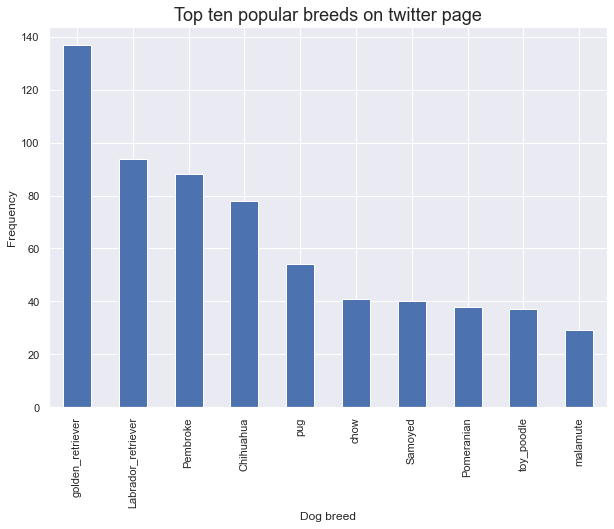

In [55]:
#Top ten most popular dog breeds on the twitter page
twitter_df_clean.query('p1_dog == True').p1.value_counts().head(10).plot(kind='bar',figsize=(10,7))
plt.title('Top ten popular breeds on twitter page',fontsize=18)
plt.xlabel('Dog breed')
plt.ylabel('Frequency');